# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q="
counter =1
calls = 1

lon = []
lat = []
temp = []
clouds = []
wind = []
city_name = []
humid = []

for city in cities:
    if counter <=50:
        try:
            response = requests.get(query_url + city+ "&units=imperial").json()
            print(f"Call #{calls}. Retrieiving city {counter} of 50: {city}, current weather: {response['weather'][0]['main']}")
            counter += 1
            city_name.append(city)
            lon.append(response['coord']['lon'])
            lat.append(response['coord']['lat'])
            temp.append(response['main']['temp'])
            clouds.append(response['clouds']['all'])
            humid.append(response['main']['humidity'])
            wind.append(response['wind']['speed'])
            
        except:
            print(f"Call #{calls}. {city} Not Found")
    else:
        print('-------------------------')
        print(f"Resetting Timer")
        time.sleep(60)
        calls +=1
        counter = 1

        
print("Finished!")

Call #1. Retrieiving city 1 of 50: alegrete, current weather: Clouds
Call #1. Retrieiving city 2 of 50: ushuaia, current weather: Rain
Call #1. Retrieiving city 3 of 50: beloha, current weather: Clouds
Call #1. Retrieiving city 4 of 50: athabasca, current weather: Clouds
Call #1. nizhneyansk Not Found
Call #1. Retrieiving city 5 of 50: poum, current weather: Clouds
Call #1. Retrieiving city 6 of 50: atuona, current weather: Clear
Call #1. Retrieiving city 7 of 50: busselton, current weather: Clouds
Call #1. Retrieiving city 8 of 50: niquelandia, current weather: Clouds
Call #1. Retrieiving city 9 of 50: jamestown, current weather: Rain
Call #1. Retrieiving city 10 of 50: kemijarvi, current weather: Clouds
Call #1. Retrieiving city 11 of 50: albany, current weather: Clouds
Call #1. Retrieiving city 12 of 50: gao, current weather: Clear
Call #1. tumannyy Not Found
Call #1. Retrieiving city 13 of 50: barrow, current weather: Clouds
Call #1. Retrieiving city 14 of 50: baijiantan, current w

Call #3. Retrieiving city 13 of 50: grand gaube, current weather: Clouds
Call #3. Retrieiving city 14 of 50: ribeira grande, current weather: Clouds
Call #3. Retrieiving city 15 of 50: kaitangata, current weather: Clouds
Call #3. Retrieiving city 16 of 50: sistranda, current weather: Clouds
Call #3. Retrieiving city 17 of 50: sidi ali, current weather: Clouds
Call #3. Retrieiving city 18 of 50: qaanaaq, current weather: Clear
Call #3. Retrieiving city 19 of 50: luderitz, current weather: Clouds
Call #3. Retrieiving city 20 of 50: atar, current weather: Clouds
Call #3. Retrieiving city 21 of 50: broome, current weather: Clouds
Call #3. Retrieiving city 22 of 50: cheremshanka, current weather: Clouds
Call #3. Retrieiving city 23 of 50: sao filipe, current weather: Clouds
Call #3. Retrieiving city 24 of 50: dunedin, current weather: Clouds
Call #3. zlatoustovsk Not Found
Call #3. Retrieiving city 25 of 50: necochea, current weather: Rain
Call #3. Retrieiving city 26 of 50: pevek, current 

Call #5. Retrieiving city 25 of 50: kollo, current weather: Clear
Call #5. Retrieiving city 26 of 50: santa cruz cabralia, current weather: Clouds
Call #5. Retrieiving city 27 of 50: mango, current weather: Clear
Call #5. cheuskiny Not Found
Call #5. Retrieiving city 28 of 50: saurimo, current weather: Clouds
Call #5. Retrieiving city 29 of 50: coahuayana, current weather: Clear
Call #5. Retrieiving city 30 of 50: tatarsk, current weather: Clouds
Call #5. Retrieiving city 31 of 50: clarence town, current weather: Clouds
Call #5. Retrieiving city 32 of 50: alugan, current weather: Rain
Call #5. Retrieiving city 33 of 50: ambovombe, current weather: Clear
Call #5. Retrieiving city 34 of 50: saint-joseph, current weather: Clouds
Call #5. Retrieiving city 35 of 50: high rock, current weather: Clouds
Call #5. Retrieiving city 36 of 50: turukhansk, current weather: Clear
Call #5. Retrieiving city 37 of 50: kortkeros, current weather: Clouds
Call #5. Retrieiving city 38 of 50: aliartos, curre

Call #7. samusu Not Found
Call #7. Retrieiving city 41 of 50: islampur, current weather: Clear
Call #7. Retrieiving city 42 of 50: falmouth, current weather: Clouds
Call #7. Retrieiving city 43 of 50: lusaka, current weather: Clouds
Call #7. Retrieiving city 44 of 50: zhigansk, current weather: Clouds
Call #7. Retrieiving city 45 of 50: hailun, current weather: Clouds
Call #7. Retrieiving city 46 of 50: katsuura, current weather: Clouds
Call #7. Retrieiving city 47 of 50: pathein, current weather: Clear
Call #7. Retrieiving city 48 of 50: sola, current weather: Clouds
Call #7. Retrieiving city 49 of 50: aldan, current weather: Clouds
Call #7. Retrieiving city 50 of 50: sterling, current weather: Clouds
-------------------------
Resetting Timer
Call #8. Retrieiving city 1 of 50: buncrana, current weather: Clouds
Call #8. Retrieiving city 2 of 50: wamba, current weather: Clear
Call #8. Retrieiving city 3 of 50: kirakira, current weather: Rain
Call #8. seekirchen Not Found
Call #8. Retrie

Call #10. Retrieiving city 2 of 50: barkhan, current weather: Clear
Call #10. Retrieiving city 3 of 50: charters towers, current weather: Clear
Call #10. Retrieiving city 4 of 50: yar-sale, current weather: Clouds
Call #10. Retrieiving city 5 of 50: miracema do tocantins, current weather: Clouds
Call #10. Retrieiving city 6 of 50: ponta delgada, current weather: Clouds
Call #10. Retrieiving city 7 of 50: nieuwpoort, current weather: Clouds
Call #10. buon me thuot Not Found
Call #10. Retrieiving city 8 of 50: chunskiy, current weather: Clouds
Call #10. Retrieiving city 9 of 50: te anau, current weather: Clouds
Call #10. Retrieiving city 10 of 50: buluang, current weather: Rain
Call #10. Retrieiving city 11 of 50: rio gallegos, current weather: Clouds
Call #10. Retrieiving city 12 of 50: xam nua, current weather: Clouds
Call #10. Retrieiving city 13 of 50: yulara, current weather: Clear
Call #10. kawana waters Not Found
Call #10. Retrieiving city 14 of 50: porto novo, current weather: Cl

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
city_df = pd.DataFrame({"City":city_name, 
                        "Latitude":lat, 
                        "Longitude":lon, 
                        "Temperature":temp, 
                        "Cloudiness":clouds, 
                        "Wind Speed":wind,
                        "Humidity":humid, 
                       })
city_df.to_csv("city_data.csv", index = False)
city_df.head(20)
    
    

,City,Latitude,Longitude,Temperature,Cloudiness,Wind Speed,Humidity
0,alegrete,-29.7831,-55.7919,82.35,44,8.01,38
1,ushuaia,-54.8000,-68.3000,49.66,100,6.91,93
2,beloha,-25.1667,45.0500,73.60,41,11.95,91
3,athabasca,54.7169,-113.2854,18.19,100,6.06,85
4,poum,-20.2333,164.0167,81.19,98,7.85,78
5,atuona,-9.8000,-139.0333,77.74,3,10.76,76
6,busselton,-33.6500,115.3333,68.04,13,8.86,68
7,niquelandia,-14.4739,-48.4597,69.64,87,2.08,92
8,jamestown,42.0970,-79.2353,40.89,100,18.41,63
9,kemijarvi,66.7131,27.4306,1.38,14,3.74,97


In [10]:
city_df.describe()

,Latitude,Longitude,Temperature,Cloudiness,Wind Speed,Humidity
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,20.421919,16.215870,49.260342,59.167568,7.628757,74.994595
std,33.681683,90.606567,30.895582,41.306318,5.684092,19.743069
min,-54.800000,-179.166700,-32.530000,0.000000,0.000000,11.000000
25%,-8.450000,-63.093750,30.505000,12.000000,3.485000,64.000000
50%,22.890900,18.750000,59.810000,75.000000,6.110000,80.000000
75%,49.162500,94.091650,74.540000,100.000000,10.360000,90.000000
max,78.218600,179.316700,94.770000,100.000000,33.870000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
city_df.sort_values('Humidity', ascending = False)

,City,Latitude,Longitude,Temperature,Cloudiness,Wind Speed,Humidity
121,cheremshanka,56.1192,60.2680,0.84,90,2.53,100
68,puerto ayora,-0.7393,-90.3518,72.55,60,1.01,100
294,suntar,62.1444,117.6319,-17.46,93,3.74,100
404,vilyuysk,63.7553,121.6247,-27.11,98,2.24,100
457,chunskiy,56.0815,99.6342,-24.84,19,2.19,100
...,...,...,...,...,...,...,...
277,tessalit,20.1986,1.0114,63.93,57,3.74,16
351,wamba,8.9333,8.6000,70.77,4,4.27,15
150,koutiala,12.3917,-5.4642,71.78,0,9.69,14
11,gao,16.6362,1.6370,67.82,0,10.78,12


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

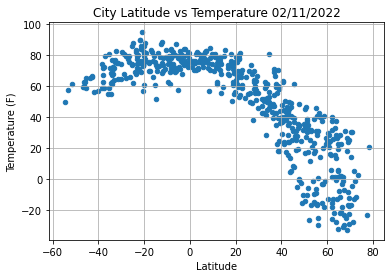

In [46]:
city_df.plot.scatter(x='Latitude', y='Temperature')
plt.ylabel("Temperature (F)")
plt.title(f'City Latitude vs Temperature {date.today().strftime("%m/%d/%Y")}')
plt.grid()
plt.savefig("temperature_scatter.png")
plt.show()

* The Latitude shows the difference in the seasons from the Northern and Southern Hemispheres. After a latitude of 20, the temperatures begin to drop drastically showing that cities in the Northern Hemisphere are currently in winter, while cities in the Southern Hemisphere are currently in Summer. We would expect this plot to be a mirror immage with the lower temperatures on the left and the higher temperatures on the right in the months around June, July, and Augsut.


## Latitude vs. Humidity Plot

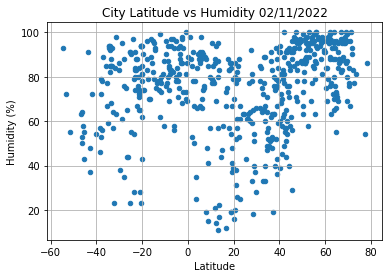

In [47]:
from datetime import date

city_df.plot.scatter(x='Latitude', y='Humidity')
plt.ylabel("Humidity (%)")
plt.title(f'City Latitude vs Humidity {date.today().strftime("%m/%d/%Y")}')
plt.grid()
plt.savefig("humidity_scatter.png")
plt.show()

* It appears that cities at higher latitudes are clustered with higher humidities. Whereas cities from -60 latitude to about -20 latitude and from 0 latitude to around 50 latitude have varying humidities. This could be explained by higher latitutude cities being closer together because of less surface area on the Earth near the North Pole. Therefore, it is likely that all of the cities near the Poles will have similar humidity levels. 


## Latitude vs. Cloudiness Plot

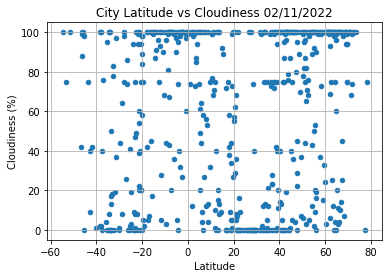

In [48]:
from datetime import date

city_df.plot.scatter(x='Latitude', y='Cloudiness')
plt.ylabel("Cloudiness (%)")
plt.title(f'City Latitude vs Cloudiness {date.today().strftime("%m/%d/%Y")}')
plt.grid()
plt.savefig("cloudiness_scatter.png")
plt.show()

* The plot shows that there are 4 clusters. Cities within 20 degrees of the equator are clustered near 100% cloudiness at the level. Most of the cities between -20 and -40 and between 20 and 40 are clustered near 0% cloudiness, and above 40 latitude the cities are clustered near 100% cloudiness again. 

## Latitude vs. Wind Speed Plot

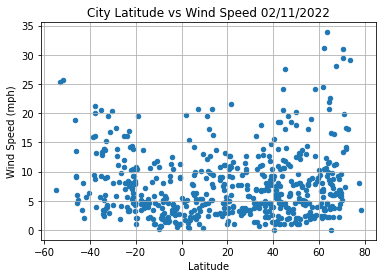

In [49]:
from datetime import date

city_df.plot.scatter(x='Latitude', y='Wind Speed')
plt.ylabel("Wind Speed (mph)")
plt.title(f'City Latitude vs Wind Speed {date.today().strftime("%m/%d/%Y")}')
plt.grid()
plt.savefig("winds_scatter.png")
plt.show()

* The majority of cities have wind speeds 15 mph or lower. Most of the extreme wind speeds are above 60 or below -40 latitude. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

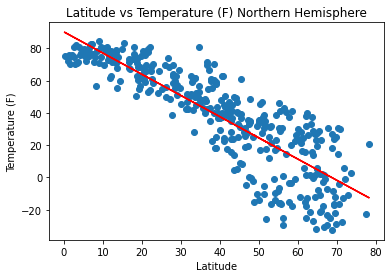

In [50]:
northern = city_df.loc[city_df['Latitude']>=0, :]
x_values = northern['Latitude']
y_values = northern['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel('Temperature (F)')
plt.xlabel("Latitude")
plt.title("Latitude vs Temperature (F) Northern Hemisphere")
plt.savefig("north_temperature_regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

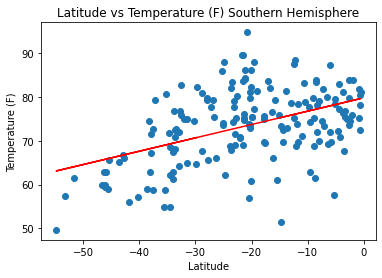

In [51]:
southern = city_df.loc[city_df['Latitude']<0, :]
x_values = southern['Latitude']
y_values = southern['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel('Temperature (F)')
plt.xlabel("Latitude")
plt.title("Latitude vs Temperature (F) Southern Hemisphere")
plt.savefig("south_temperature_regression.png")
plt.show()

## Temperature Regression Analysis
* One of the first things you may notice when comparing Northern vs Southern Hemispheres is that the Northern Hemisphere has a negative slope while Souther Hemisphere has a positive slope. This shows that as latitudes approach the equator (0), the temperatures increase and the further away, the colder it gets. There is also a trend that in the Northern Hemisphere, the data points are closer to the regression line than those of the southern hemisphere. This could be due to that we have more data points from the Northern hemisphere which would make our regression more accurate. It could also be explained by more consistent terrains in the Northern Hemisphere than in the Southern Hemisphere which could lead to more similar climates. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

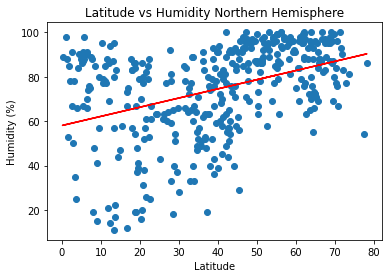

In [52]:
x_values = northern['Latitude']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel('Humidity (%)')
plt.xlabel("Latitude")
plt.title("Latitude vs Humidity Northern Hemisphere")
plt.savefig("north_humidity_regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

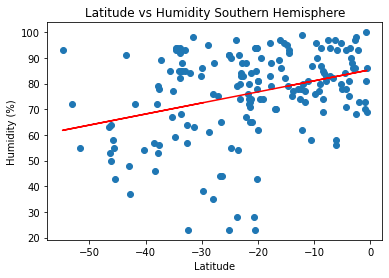

In [53]:
x_values = southern['Latitude']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel('Humidity (%)')
plt.xlabel("Latitude")
plt.title("Latitude vs Humidity Southern Hemisphere")
plt.savefig("south_humidity_regression.png")
plt.show()

## Humidity Regression Analysis
* Both hemispheres have a positive slope which means that the trend of increasing humidities continues for all latitudes. The more North, the higher the humidity. However, one difference in that for the northern hemisphere, the humidities are more spread out near the equator whereas for the souther hemisphere, the humdities are more spread out near the south pole. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

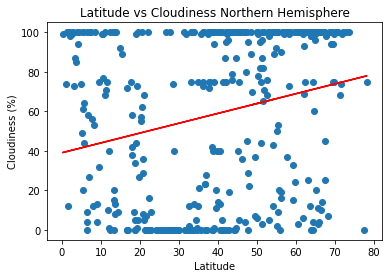

In [54]:
x_values = northern['Latitude']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitude")
plt.title("Latitude vs Cloudiness Northern Hemisphere")
plt.savefig("north_cloudiness_regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

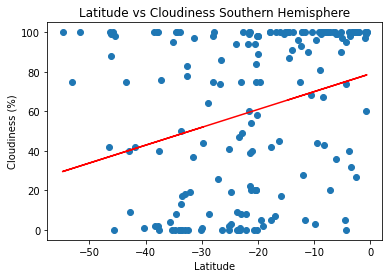

In [58]:
x_values = southern['Latitude']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitude")
plt.title("Latitude vs Cloudiness Southern Hemisphere")
plt.savefig("south_cloudiness_regression.png")
plt.show()

## Cloudiness Regression Analysis
* There doesn't seem to be any trend for cloudiness compared to latitude for either hemisphere. It is clear from this data that Cloudiness is not affected by the latitude of a city. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

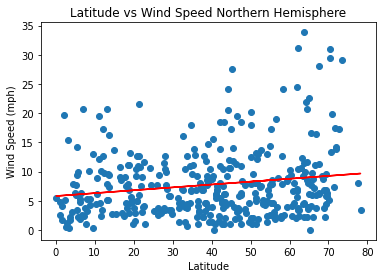

In [56]:
x_values = northern['Latitude']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel('Wind Speed (mph)')
plt.xlabel("Latitude")
plt.title("Latitude vs Wind Speed Northern Hemisphere")
plt.savefig("north_winds_regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

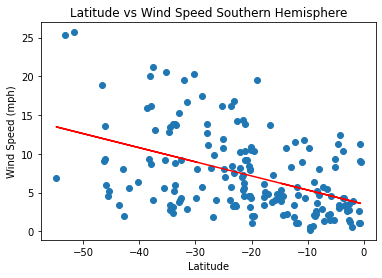

In [57]:
x_values = southern['Latitude']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel('Wind Speed (mph)')
plt.xlabel("Latitude")
plt.title("Latitude vs Wind Speed Southern Hemisphere")
plt.savefig("south_winds_regression.png")
plt.show()

## Wind Speed Regression Analysis
* The Northern Hemisphere appears to have a more constant trend for wind speed showing that wind speed is not affected by latitude that much in the Northern Hemisphere. In the Southern Hemisphere, there is a stronger relationship with a negative slope showing that wind speeds tend to decrease near the equator and then level out as you move more North. 